<a href="https://colab.research.google.com/github/febri009/Animal-classification/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Nama: Febriyanti Paramudita

> Email: muditafebriyanti@gmail.com

> Domisili: Purwokerto, Jawa Tengah







# **Import Library**

In [2]:
import numpy as np
import pandas as pd
import zipfile
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

# **Unggah Dataset**

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"febriyantiparamudita","key":"baf6983c55290ee1ad05c8ebf9669c3d"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           1872         36  1.0              
marouandaghmoumi/dropout-and-success-student-data-analysis   Dropout and Success: Student Data Analysis   87KB  2023-12-31 15:44:56           1385         35  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3469        282  1.0              
risakashiwabara/netfllixrecommended-topic-for-long-vacation  😊📺 Netfllix data😊📺                            1KB  202

In [6]:
!kaggle datasets download -d alessiocorrado99/animals10

 98% 572M/586M [00:07<00:00, 157MB/s]
100% 586M/586M [00:07<00:00, 81.5MB/s]


In [7]:
zipPath = '../content/animals10.zip'
zipFile = zipfile.ZipFile(zipPath, 'r')
zipFile.extractall('../content/animals10')
zipFile.close()

# **Mengubah data menjadi Data Frame**

In [8]:
image_data ='../content/animals10/raw-img'

In [9]:
pd.DataFrame(os.listdir(image_data),columns=['Files_name'])

,Files_name
0,elefante
1,farfalla
2,cane
3,pecora
4,cavallo
5,ragno
6,gatto
7,gallina
8,scoiattolo
9,mucca


In [10]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,../content/animals10/raw-img/gallina/231.jpeg,gallina
1,../content/animals10/raw-img/cane/OIP-CUFBKqK9...,cane
2,../content/animals10/raw-img/cane/OIP-6fVdgI5d...,cane
3,../content/animals10/raw-img/cavallo/OIP-MpjOv...,cavallo
4,../content/animals10/raw-img/pecora/OIP-9oUhQf...,pecora
...,...,...
26174,../content/animals10/raw-img/elefante/OIP-M8ad...,elefante
26175,../content/animals10/raw-img/gallina/635.jpeg,gallina
26176,../content/animals10/raw-img/cavallo/OIP-5pXv4...,cavallo
26177,../content/animals10/raw-img/gallina/OIP-CSjMR...,gallina


# **Membagi data train dan test**

In [11]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [12]:
class_names = train.class_names
class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

# **Plot gambar**

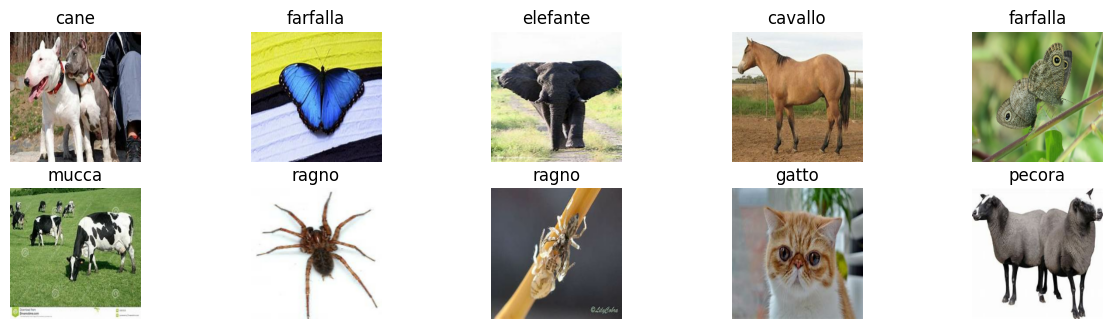

In [13]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(10):
        ax = plt.subplot(10, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# **Arsitektur model menggunakan CNN**

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 batch_normalization_6 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                                
                                                      

# **Compile model**

In [19]:
model.compile(optimizer ='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
checkpoint =ModelCheckpoint("Animal_classification.h5", save_best_only=True)

class EarlyStopAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, accuracy=0.92):
        super(EarlyStopAtAccuracy, self).__init__()
        self.accuracy = accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.accuracy and logs['val_accuracy'] >= self.accuracy:
            self.model.stop_training = True
            print(f"\nTraining stopped as accuracy and val_accuracy reached {self.accuracy*100}%")

early_stopping = EarlyStopAtAccuracy(accuracy=0.92)

# **Training**

In [30]:
CNN=model.fit_generator(
    train,
    epochs=50,
    validation_data=validation,
    callbacks=[checkpoint,early_stopping])

Epoch 1/50
  6/655 [..............................] - ETA: 1:14 - loss: 0.5019 - accuracy: 0.8438

655/655 [==============================] - 75s 114ms/step - loss: 0.4125 - accuracy: 0.8594 - val_loss: 0.3412 - val_accuracy: 0.8854
Epoch 2/50
655/655 [==============================] - 74s 113ms/step - loss: 0.4024 - accuracy: 0.8589 - val_loss: 0.5332 - val_accuracy: 0.8183
Epoch 3/50
655/655 [==============================] - 73s 111ms/step - loss: 0.3967 - accuracy: 0.8637 - val_loss: 0.3502 - val_accuracy: 0.8840
Epoch 4/50
655/655 [==============================] - 75s 114ms/step - loss: 0.3840 - accuracy: 0.8682 - val_loss: 0.2891 - val_accuracy: 0.9089
Epoch 5/50
655/655 [==============================] - 78s 119ms/step - loss: 0.3807 - accuracy: 0.8670 - val_loss: 0.4336 - val_accuracy: 0.8523
Epoch 6/50
655/655 [==============================] - 73s 111ms/step - loss: 0.3821 - accuracy: 0.8665 - val_loss: 0.2657 - val_accuracy: 0.9158
Epoch 7/50
655/655 [==============================] - 75s 114ms/step - loss: 0.3725 - accuracy: 0.8715 - val_loss: 0.2944 - val_accuracy: 0.9

# Evaluation

In [31]:
score, acc = model.evaluate(validation)
print('Validation Loss =', score)
print('Validation Accuracy =', acc)

164/164 [==============================] - 8s 48ms/step - loss: 0.1601 - accuracy: 0.9538
Validation Loss = 0.16013206541538239
Validation Accuracy = 0.9537726640701294


# **Plot loss**

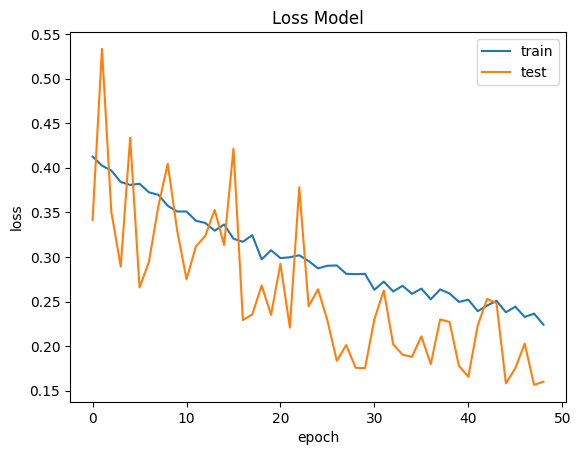

In [32]:
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Plot accuracy**

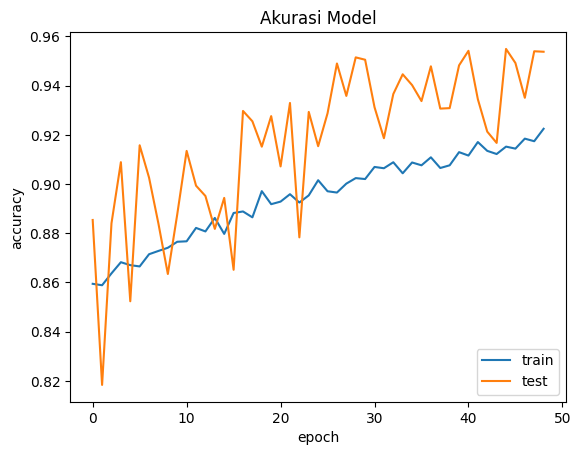

In [33]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# **Convert model to TF-Lite**

In [34]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Animal_Classification.tflite', 'wb') as f:
  f.write(tflite_model)